In [1]:
### Funcoes que serao realocadas em outros arquvos

In [2]:
renomeador = {
    "Periculosidade": {"p": "venenoso", "e": "comestível"},
    "Forma": {"b":"Bell", "c":"Conical", "x":"Convex","f":"Flat", "k":"Knobbed", "s":"Sunken"},
    "Formato chapéu": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "Cor chapéu": {"n":"Marrom", "b":"Buff", "c":"Cinanamon","g":"Cinza", "r":"Verde", "p":"Rosa", "u":"Roxo", "e":"Vermelho", "w":"Branco","y":"Amarelo"},
    "Machucada": {"t": "machucada", "f": "nao machucada"},
    "Odor": {"a":"Almond", "l":"Anise", "c":"Creosote","y":"Fishy", "f":"Foul", "m":"Musty","n":"none", "p":"Pungent", "s":"Spicy"},
    "Ligação Branquea": {"a": "Attached", "d": "Descending", "f": "Free", "n":"notched"},
    "Espaçamento Branquia": {"c": "Close", "w": "Crowded", "d": "Distant"},
    "Tamanho Branquia": {"b": "Broad", "n": "Narrow"},
    "Cor Branquia": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Stalk forma": {"e": "Enlarging", "t": "Tapering"},
    "Stalk raiz": {"b": "Bulbuos", "c": "Club","u": "Cup", "e": "Equal","z": "Rhizomorphs", "r": "Rooted", "?": "missing"},
    "Stalk superficie emcima do anel": {"f": "Fibrous", "y": "Scaly", "k": "Silky", "s": "Smooth"},
    "Stalk superficie embaixo do anel": {"f": "Fibrous", "y": "Scaly", "k": "Silky", "s": "Smooth"},
    "Stalk cor emcima do anel": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Stalk cor embaixo do anel": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "Veil tipo": {"p": "Partipial", "u": "Universal"},
    "Veil cor": {"n": "Brown", "o": "Orange", "w": "White", "y": "Yellow"},
    "Numero Anel": {"n": "none", "o": "one", "t": "two"},
    "Tipo Anel": {"c": "Cobwebby", "e": "Evanescent", "f": "Flaring", "l": "Large", "n": "None", "p": "Pendant", "s": "Sheathing", "z": "Zone"},
    "Cor poro": {"k":"Black", "n":"Brown", "b":"Buff","h":"Chocolate", "g":"Gray", "r":"Green", "o":"Orange", "p":"Pink", "u":"Purple","e":"Red", "w": "White", "y": "Yellow"},
    "População": {"a": "Abundant", "c": "Clustered", "n": "Numerous", "s": "Scattered", "v": "Several", "y": "Solitary"},
    "Habitat": {"g":"grama","l":"folhas","m":"prados","p":"paths","u":"urbano","w":"waste","d":"madeira"},
}


In [3]:
def Limpeza():
    i = 0
    for nomeClasse,listaValores in renomeador.items():
        data.rename(columns={data.columns[i]:nomeClasse}, inplace=True)
        data[nomeClasse].replace(listaValores, inplace=True)
        i += 1

In [4]:
def Previsão(tipo,k,logistica=False):
    
    if logistica:
        model = tipo(solver='lbfgs',multi_class='auto',max_iter=1000)
    else:
        model = tipo()
    
    model.fit(X_treino,Y_treino);
    
    model.score(X_teste,Y_teste);
    
    Y_predict = model.predict(X_teste)
    
    acertos=0
    for i in range(len(X_teste)):
        
        if Y_predict[i]==Y_teste.iloc[i]:
            acertos+=1    
        #else:
         #   print('Error',data.iloc[X_teste.index])
                    
    print()

    print()
    
    print('Numero de acertos:',acertos)
    
    erros = len(X_teste)-acertos
    print('Número de erros:',erros)
    
    print('Porcentagem de acertos: {:.2f}%'.format(acertos/len(X_teste)*100) )
    
    plt.pie([acertos,len(X_teste)-acertos],
            explode=[1,-.95],
            labels=[None,'Erros'], 
            colors=["#98FB98","#0B6623"]);
    
    plt.show()

## Projeto 2 Ciência dos Dados 2020.1
___
- Daniel Gurgel Terra
- Gabriel Formario
___

    Dada as características biológica dos cogumelos é possível um machine learning determinar se eles são venenosos ou comestíveis ?

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Limpeza de Dados

In [7]:
data = pd.read_csv("mushrooms.csv"); data[:5]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
Limpeza(); data[:5] 

,Periculosidade,Forma,Formato chapéu,Cor chapéu,Machucada,Odor,Ligação Branquea,Espaçamento Branquia,Tamanho Branquia,Cor Branquia,...,Stalk superficie embaixo do anel,Stalk cor emcima do anel,Stalk cor embaixo do anel,Veil tipo,Veil cor,Numero Anel,Tipo Anel,Cor poro,População,Habitat
0,venenoso,Convex,smooth,Marrom,machucada,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partipial,White,one,Pendant,Black,Scattered,urbano
1,comestível,Convex,smooth,Amarelo,machucada,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partipial,White,one,Pendant,Brown,Numerous,grama
2,comestível,Bell,smooth,Branco,machucada,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partipial,White,one,Pendant,Brown,Numerous,prados
3,venenoso,Convex,scaly,Branco,machucada,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partipial,White,one,Pendant,Black,Scattered,urbano
4,comestível,Convex,smooth,Cinza,nao machucada,none,Free,Crowded,Broad,Black,...,Smooth,White,White,Partipial,White,one,Evanescent,Brown,Abundant,grama



### Características

#### Quantidade dos cogumelos do dataset para cada tipo de classe

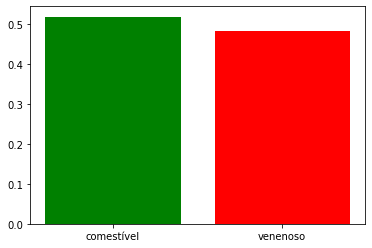

In [9]:
periculosidade = data["Periculosidade"].value_counts(True)
plt.bar(periculosidade.index, periculosidade, color=["g","r"]);

#### Quantidade dos cogumelos do dataset para cada tipo de habitat

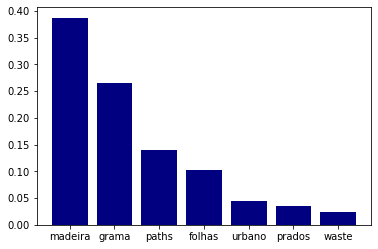

In [10]:
habitat = data["Habitat"].value_counts(True);
plt.bar(habitat.index, habitat, color="#000080");

#### Quantidade dos cogumelos do dataset para cada tipo de forma

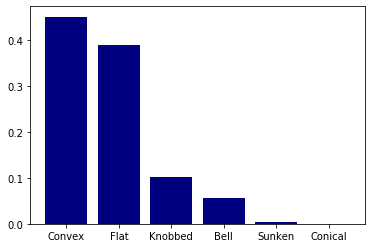

In [11]:
forma = data['Forma'].value_counts(True);
plt.bar(forma.index, forma, color="#000080");

#### Quantidade dos cogumelos venenosos e comestíveis do para cor do chapéu


In [12]:
#Metódo obtido a partir do Kaggle dentro da área de kernels do nosso dataset

In [13]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = data['Cor chapéu'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

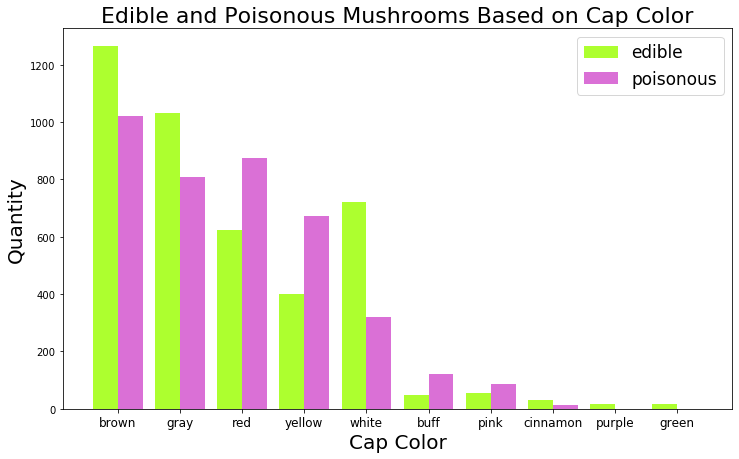

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [14]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(data[data['Cor chapéu'] == capColor].index)
    edibles = len(data[(data['Cor chapéu'] == capColor) & (data['Periculosidade'] == 'comestível')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
plt.show()
print(edible_cc)
print(poisonous_cc)

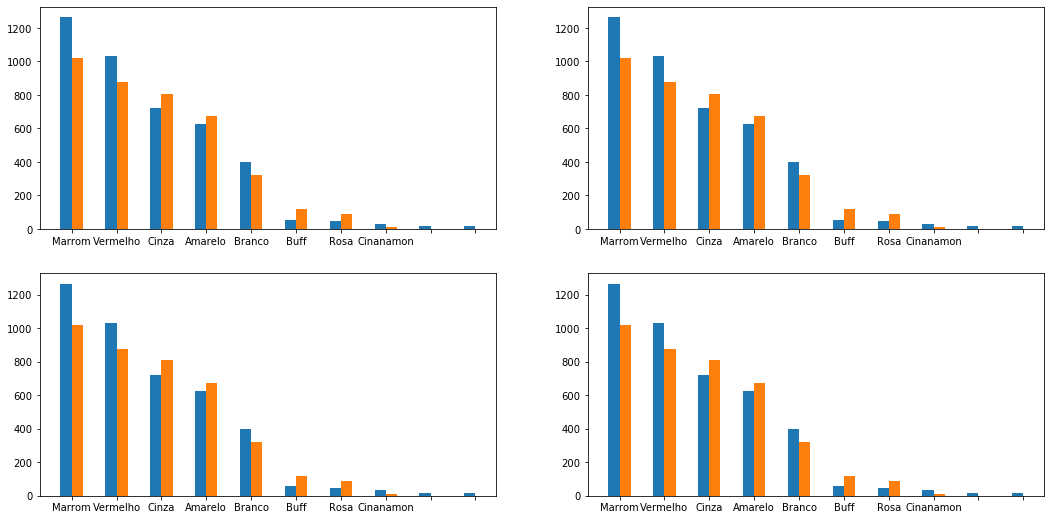

In [15]:
colunas = list(renomeador.keys())

Venenoso = data[data['Periculosidade']=='venenoso'][colunas[3]].value_counts()
Comestivel = data[data['Periculosidade']=='comestível'][colunas[3]].value_counts()

plt.figure(figsize=(18,9))

plt.subplot(2,2,1)
plt.bar( np.arange(len(Comestivel)), Comestivel.values.tolist(), width=.25)
plt.bar( np.arange(len(Venenoso)) + [.25]*len(Venenoso), Venenoso.values.tolist(), width=.25)
plt.xticks(np.arange(10)+10*[0.125],Venenoso.axes[0].tolist());

plt.subplot(2,2,2)
plt.bar( np.arange(len(Comestivel)), Comestivel.values.tolist(), width=.25)
plt.bar( np.arange(len(Venenoso)) + [.25]*len(Venenoso), Venenoso.values.tolist(), width=.25)
plt.xticks(np.arange(10)+10*[0.125],Venenoso.axes[0].tolist());

plt.subplot(2,2,3)
plt.bar( np.arange(len(Comestivel)), Comestivel.values.tolist(), width=.25)
plt.bar( np.arange(len(Venenoso)) + [.25]*len(Venenoso), Venenoso.values.tolist(), width=.25)
plt.xticks(np.arange(10)+10*[0.125],Venenoso.axes[0].tolist());

plt.subplot(2,2,4)
plt.bar( np.arange(len(Comestivel)), Comestivel.values.tolist(), width=.25)
plt.bar( np.arange(len(Venenoso)) + [.25]*len(Venenoso), Venenoso.values.tolist(), width=.25)
plt.xticks(np.arange(10)+10*[0.125],Venenoso.axes[0].tolist());

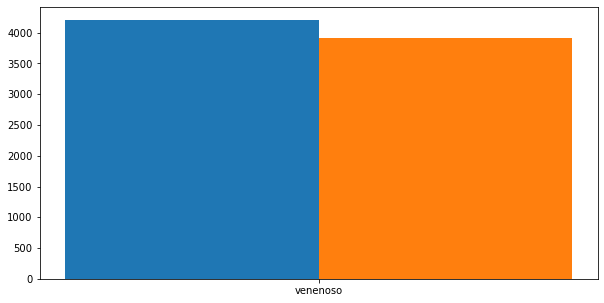

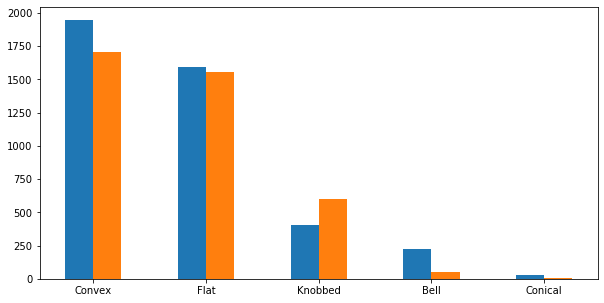

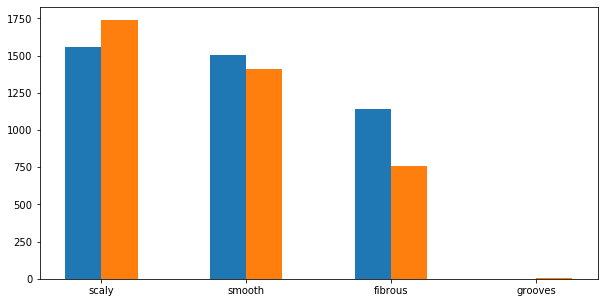

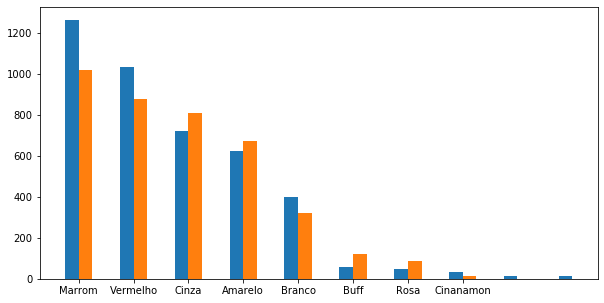

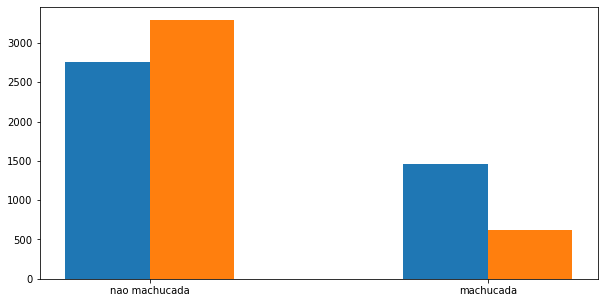

In [16]:
for i in range(5):
    
    plt.figure(figsize=(10,5))
    
    Venenoso = data[data['Periculosidade']=='venenoso'][colunas[i]].value_counts()
    Comestivel = data[data['Periculosidade']=='comestível'][colunas[i]].value_counts()

    plt.bar( np.arange(len(Comestivel)), Comestivel.values.tolist(), width=.25)

    plt.bar( np.arange(len(Venenoso)) + [.25]*len(Venenoso), Venenoso.values.tolist(), width=.25)

    plt.xticks(np.arange(len(Venenoso)) + len(Venenoso)*[0.125],Venenoso.axes[0].tolist())

plt.show()

### Previsoes do classificador

In [17]:
# Método encontrado na internet/ busca na área de Kernels do dataset no Kaagle
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [18]:
data['Habitat'].unique()

array([5, 1, 4, 2, 3, 6, 0])

In [19]:
data[:5]

,Periculosidade,Forma,Formato chapéu,Cor chapéu,Machucada,Odor,Ligação Branquea,Espaçamento Branquia,Tamanho Branquia,Cor Branquia,...,Stalk superficie embaixo do anel,Stalk cor emcima do anel,Stalk cor embaixo do anel,Veil tipo,Veil cor,Numero Anel,Tipo Anel,Cor poro,População,Habitat
0,1,2,3,5,0,6,1,0,1,0,...,3,6,6,0,2,1,4,0,3,5
1,0,2,3,0,0,0,1,0,0,0,...,3,6,6,0,2,1,4,1,2,1
2,0,0,3,1,0,1,1,0,0,1,...,3,6,6,0,2,1,4,1,2,4
3,1,2,2,1,0,6,1,0,1,1,...,3,6,6,0,2,1,4,0,3,5
4,0,2,3,4,1,8,1,1,0,0,...,3,6,6,0,2,1,0,1,0,1


In [20]:
# características dos animais para o teste;
inputs = data.drop(columns=["Periculosidade"])
# resultado esperado;
target = data["Periculosidade"]
#separando dataframes teste e treino
X_treino,X_teste,Y_treino,Y_teste=tts(inputs,target,test_size=0.8)

#### Decision Tree



Numero de acertos: 6500
Número de erros: 0
Porcentagem de acertos: 100.00%


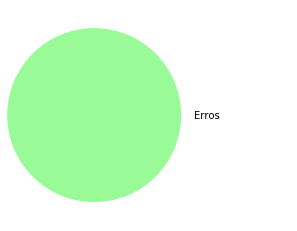

In [21]:
Previsão(DecisionTree,0)

#### Logistic Regression



Numero de acertos: 6177
Número de erros: 323
Porcentagem de acertos: 95.03%


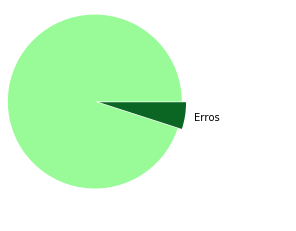

In [22]:
Previsão(LogisticRegression,0,logistica=True);

#### NB Bernoulli



Numero de acertos: 5844
Número de erros: 656
Porcentagem de acertos: 89.91%


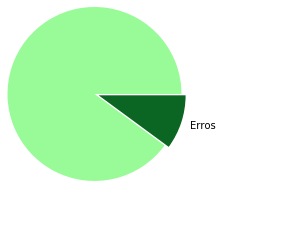

In [23]:
Previsão(BernoulliNB,0)

#### NB Gaussian



Numero de acertos: 4434
Número de erros: 2066
Porcentagem de acertos: 68.22%


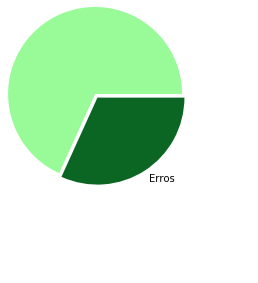

In [24]:
Previsão(GaussianNB,0)